# Linear Models (線性) 
- [`Lasso`](https://scikit-learn.org/stable/modules/linear_model.html#lasso)
- [`Ridge regression`](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)
- [`Elastic-Net`](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

+ 做線性回歸（$y=ax+b$）時，資料必須符合常態分佈
+ 所以需要先將題目和答案，從偏態分佈修正為常態分佈
+ 最後再將測試答案反向操作，從常態分佈改回原本分佈樣貌

## step1: 資料預處理

In [1]:
import pandas as pd

train_df = pd.read_csv("house/train.csv", encoding="utf-8")
test_df = pd.read_csv("house/test.csv", encoding="utf-8")

In [2]:
# 把 train_df 和 test_df 合併起來一起做資料預處理
total_df = pd.concat([train_df, test_df], axis=0)

In [3]:
# total_df = x_train + x_test，是要處理的全部資料
total_df = total_df.drop(["SalePrice"], axis=1)
total_df = total_df.drop(["Id"], axis=1)
total_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### 修正為常態分佈：題目

In [4]:
# 取出所有特徵為數值型的，準備將偏態修正為常態分佈
numeric_col = total_df.dtypes[total_df.dtypes != "object"]
# MSSubClass 是以數字顯示的類別型態特徵
index  = numeric_col.index.drop("MSSubClass")  
total_df_numeric = total_df[index ]
total_df_numeric

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


skew = $ \Large \frac{\frac{1}{n} \sum (x-\mu)^2}{\sigma^3} $
- skew = 0 表示左右等重(不一定等於常態分佈)
- skew > 0 表示 右 > 左 (右偏)
- skew < 0 表示 右 < 左 (左偏)

In [5]:
# 目標：找出沒有常態分佈的數值型特徵
# 手段：計算每個數值型特徵的偏態值
from scipy.stats import skew

skewness = total_df_numeric.apply(lambda s:skew(s.dropna()))
skewness.sort_values()

YearBuilt        -0.599806
YearRemodAdd     -0.451020
GarageYrBlt      -0.381942
GarageCars       -0.218260
YrSold            0.132399
FullBath          0.167606
MoSold            0.195884
OverallQual       0.197110
GarageArea        0.241176
BedroomAbvGr      0.326324
OverallCond       0.570312
BsmtFullBath      0.623741
HalfBath          0.694566
Fireplaces        0.733495
TotRmsAbvGrd      0.758367
2ndFlrSF          0.861675
BsmtUnfSF         0.919351
TotalBsmtSF       1.162285
GrLivArea         1.269358
BsmtFinSF1        1.424989
1stFlrSF          1.469604
LotFrontage       1.502351
WoodDeckSF        1.842433
OpenPorchSF       2.535114
MasVnrArea        2.601240
BsmtHalfBath      3.929996
ScreenPorch       3.946694
EnclosedPorch     4.003891
BsmtFinSF2        4.145323
KitchenAbvGr      4.302254
3SsnPorch        11.376065
LowQualFinSF     12.088761
LotArea          12.822431
PoolArea         16.898328
MiscVal          21.947195
dtype: float64

In [6]:
# 找出過度偏態的數值型特徵：skewness > 4
need_norm = skewness[skewness > 4].index
need_norm

Index(['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr',
       'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [7]:
# 利用「boxcox1p」將偏態修正為常態分佈
# boxcox1p 可以處理 次方型右偏 和 指數型右偏
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

def norm(s):
    # 避免出現 log0=infinitas (∞)，故要 +1
    # 透過 boxcox_normmax 自動計算合適的修正參數
    arg_lmbda = boxcox_normmax(s.dropna() + 1)
    return boxcox1p(s, arg_lmbda)

total_df_numeric_norm = total_df[need_norm].apply(norm)

# 查看修正後的偏態狀況
skewness = total_df_numeric_norm.apply(lambda s:skew(s.dropna()))
skewness.sort_values()

LotArea          -0.135401
EnclosedPorch     2.150157
BsmtFinSF2        2.578898
KitchenAbvGr      3.779896
MiscVal           5.239894
LowQualFinSF      8.495602
3SsnPorch         8.865144
PoolArea         14.985994
dtype: float64

In [8]:
# 經過常態分佈調整，但 PoolArea 沒變好
# 所以線性回歸時，會把 PoolArea 丟掉，避免影響計算
total_df.drop(["PoolArea"], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
# 將修正好的特徵(過度偏態)，放回資料表中 
total_df[total_df_numeric_norm.columns] = total_df_numeric_norm
total_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,13.424521,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0.0,NaN,NaN,NaN,0.000000,2,2008,WD,Normal
1,20,RL,80.0,13.694527,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0.0,NaN,NaN,NaN,0.000000,5,2007,WD,Normal
2,60,RL,68.0,14.034133,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0.0,NaN,NaN,NaN,0.000000,9,2008,WD,Normal
3,70,RL,60.0,13.683421,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0.0,NaN,NaN,NaN,0.000000,2,2006,WD,Abnorml
4,60,RL,84.0,14.550142,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0.0,NaN,NaN,NaN,0.000000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,10.503897,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0.0,NaN,NaN,NaN,0.000000,6,2006,WD,Normal
1455,160,RM,21.0,10.463055,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0.0,NaN,NaN,NaN,0.000000,4,2006,WD,Abnorml
1456,20,RL,160.0,15.304041,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0.0,NaN,NaN,NaN,0.000000,9,2006,WD,Abnorml
1457,85,RL,62.0,13.873787,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0.0,NaN,MnPrv,Shed,6.936388,7,2006,WD,Normal


### 填補缺失值 & One-Hot Encoding

In [10]:
cnt = total_df.isna().sum()  # 統計每個欄位缺失值數量
cnt[cnt > 0]                 # 僅列出有缺失值的

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [11]:
# LotFrontage 資料缺太多，所以刪掉
total_df = total_df.drop(["LotFrontage"], axis=1)

In [12]:
# 填補缺失值：數值型，填中位數
med = total_df.median()
total_df = total_df.fillna(med)

In [13]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imp = IterativeImputer(max_iter=10, random_state=0)
# data_scale = pd.DataFrame(imp.fit_transform(data_scale),
#                           columns=data_scale.columns)

In [14]:
# 省略「填補類別型缺失值」的步驟，直接做 One-Hot Encoding
# 對類別型特徵做 One-Hot Encoding
total_df = pd.get_dummies(total_df)
total_df = pd.get_dummies(total_df, columns=["MSSubClass"])
total_df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,13.424521,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,0,0,0,0,0
1,13.694527,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,0,0,0,0,0,0
2,14.034133,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,0,0,0,0,0,0
3,13.683421,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,...,1,0,0,0,0,0,0,0,0,0
4,14.550142,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,10.503897,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,...,0,0,0,0,0,0,0,1,0,0
1455,10.463055,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,...,0,0,0,0,0,0,0,1,0,0
1456,15.304041,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,...,0,0,0,0,0,0,0,0,0,0
1457,13.873787,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
# 確認是否還有缺失值
cnt = total_df.isna().sum()  # 統計每個欄位缺失值數量
cnt[cnt > 0]                 # 僅列出有缺失值的

Series([], dtype: int64)

### 資料特徵縮放 Feature Scaling
- RobustScaler：尋找 Q1 做為最小值，Q3 做為最大值

In [16]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
total_df_scaler = scaler.fit_transform(total_df)
total_df_scaler = pd.DataFrame(total_df_scaler, columns=total_df.columns)

### 分割資料

In [17]:
# 資料預處理完後，再分割 total_df 取出 x_train 和 x_test

train_df.shape[0]  # 取得 train_d 的 row 數量

x_train = total_df_scaler.iloc[:train_df.shape[0]]  # 訓練題目：total_df 前 1460 筆
x_test  = total_df_scaler.iloc[train_df.shape[0]:]  # 測試題目：total_df 後 1459 筆
y_train = train_df["SalePrice"]              # 訓練答案
testid  = test_df["Id"] 

### 修正為常態分佈：訓練答案

-0.05453798358261856


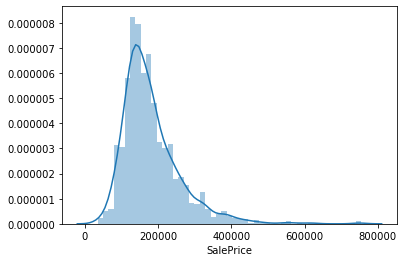

In [18]:
# 查看訓練答案的分佈狀況
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import boxcox_normmax

print(boxcox_normmax(y_train + 1))
sns.distplot(y_train)

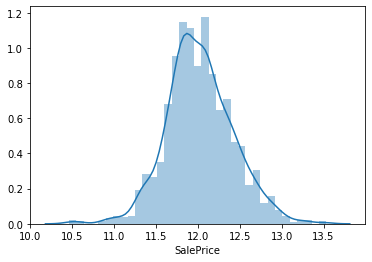

In [19]:
# 將訓練答案修正為常態分佈
# 注意：最後測試答案要反向操作
import numpy as np

y_train = np.log1p(y_train)
sns.distplot(y_train)

## step2: 建立模型並預測

線性回歸：$ y = a_1 x_1 + a_2 x_2 + ... + a_n x_n +b $

原始誤差(min) = $ \frac{1}{n} \sum (predict-true)^2 $   

　　↓　先隨意設定 $a_i$，再不斷調整 $a_i$，直到誤差變小  
　　↓　讓誤差變小，而非誤差最小，因誤差最小會過擬合  

新的誤差(min) = 原始誤差 + 懲罰參數  
　　　　　　　　　　　　　　懲罰參數 = 懲罰力度$\alpha$ × 懲罰項$f(a_1,a_2,...,a_n)$     

**線性回歸的正規化 (Regularization)**：  
- [`Lasso`](https://scikit-learn.org/stable/modules/linear_model.html#lasso)：
  - L1 Penalty 懲罰參數：$ \alpha \sum |a_{i}| = \alpha \sum |a_1|+|a_2|+...+|a_n| $
  - 使用時機：當特徵太多時，透過調整懲罰參數篩選或減少特徵，以避免產生過擬合
  - 最後 $a_1,a_2,...,a_n$ 大多會趨近於零
  - 優點：避免看太多特徵/欄位

- [`Ridge`](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)：
  - L2 Penalty 懲罰參數：$ \alpha \sum a_{i}^2 = \alpha \sum a_1^2 + a_2^2 + ... + a_n^2 $
  - 優先扣除 $a_i$ 大的，最後  $a_1,a_2,...,a_n$ 彼此不會差太多
  - 優點：避免過度依賴某個特徵/欄位

- [`ElasticNet`](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)：
  - 綜合上述兩種懲罰參數：$ \alpha \sum |a_{i}| + \alpha \sum a_{i}^2 $
  - 因為有懲罰項，所以經過 ElasticNet 正規化後，需要 Scaling；而原式子不需要 Scaling

## 1. Lasso

In [20]:
# 尋找模型參數
from sklearn.linear_model import LassoCV, Lasso

# 透過 cv 尋找懲罰參數
cv = LassoCV(cv=10)
cv.fit(x_train, y_train)
print("alpha:", cv.alpha_)      

alpha: 0.0026977177852535237


In [21]:
# 建立訓練模型
lasso = Lasso(alpha=cv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0026977177852535237, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
# 利用模型預測
# 注意訓練答案做過 np.log1p，故測試答案要 np.expm1
pre = lasso.predict(x_test)
pre = np.expm1(pre)

result_df = pd.DataFrame({
    "Id":testid,
    "SalePrice":pre
})
result_df.to_csv("house/predict_result_lasso.csv", index=False, encoding="utf-8")
result_df

,Id,SalePrice
0,1461,119388.210523
1,1462,146237.016271
2,1463,173582.831718
3,1464,203961.951959
4,1465,194694.752303
...,...,...
1454,2915,89621.129087
1455,2916,86950.672712
1456,2917,172076.016947
1457,2918,116953.999807


## 2. Ridge

In [23]:
# 尋找模型參數
from sklearn.linear_model import RidgeCV, Ridge

cv = RidgeCV(cv=10)
cv.fit(x_train, y_train)
print("alpha:", cv.alpha_) 

alpha: 10.0


In [24]:
# 建立訓練模型
ridge = Ridge(alpha=cv.alpha_)
ridge.fit(x_train, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
# 利用模型預測
# 注意訓練答案做過 np.log1p，故測試答案要 np.expm1
pre = ridge.predict(x_test)
pre = np.expm1(pre)

result_df = pd.DataFrame({
    "Id":testid,
    "SalePrice":pre
})
result_df.to_csv("house/predict_result_ridge.csv", index=False, encoding="utf-8")
result_df

,Id,SalePrice
0,1461,117879.012295
1,1462,147624.074014
2,1463,174790.662450
3,1464,195672.185191
4,1465,196905.790202
...,...,...
1454,2915,85254.887240
1455,2916,81045.591127
1456,2917,169230.155696
1457,2918,114137.035397


## 3. ElasticNet

In [26]:
# 尋找模型參數
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv = ElasticNetCV(cv=10)
cv.fit(x_train, y_train)
print("alpha:", cv.alpha_) 

alpha: 0.0053954355705070475


In [27]:
# 建立訓練模型
ela = ElasticNet(alpha=cv.alpha_)
ela.fit(x_train, y_train)

ElasticNet(alpha=0.0053954355705070475, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [28]:
# 利用模型預測
# 注意訓練答案做過 np.log1p，故測試答案要 np.expm1
pre = ela.predict(x_test)
pre = np.expm1(pre)

result_df = pd.DataFrame({
    "Id":testid,
    "SalePrice":pre
})
result_df.to_csv("house/predict_result_ela.csv", index=False, encoding="utf-8")
result_df

,Id,SalePrice
0,1461,119608.373708
1,1462,146200.253437
2,1463,173784.199288
3,1464,204179.050368
4,1465,194381.906227
...,...,...
1454,2915,89642.336576
1455,2916,87197.413413
1456,2917,172362.271420
1457,2918,116854.918951
